In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.core.display import display, HTML
from scipy.ndimage import gaussian_filter
display(HTML("<style>.container { width:100% !important; }</style>"))

### Load Data Images and Inspect

In [2]:
eye = plt.imread('eye.jpg')
eye = cv2.cvtColor(eye, cv2.COLOR_RGB2GRAY).astype('int32')
cam = plt.imread('Camera.jpg')
cam = cv2.cvtColor(cam, cv2.COLOR_RGB2GRAY).astype('int32')

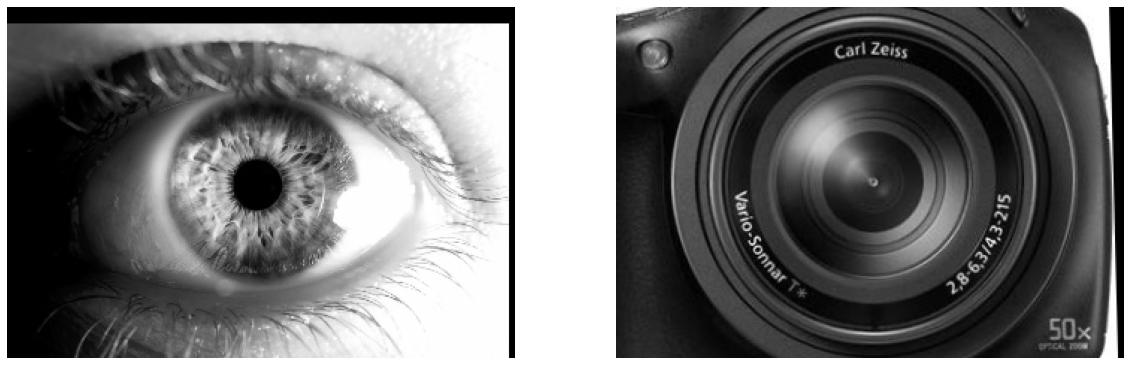

In [3]:
plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plt.subplot(121)
plt.imshow(eye, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(cam, cmap='gray')
plt.axis('off')
plt.show()

### Gaussian blur on eye image (low pass filtering)


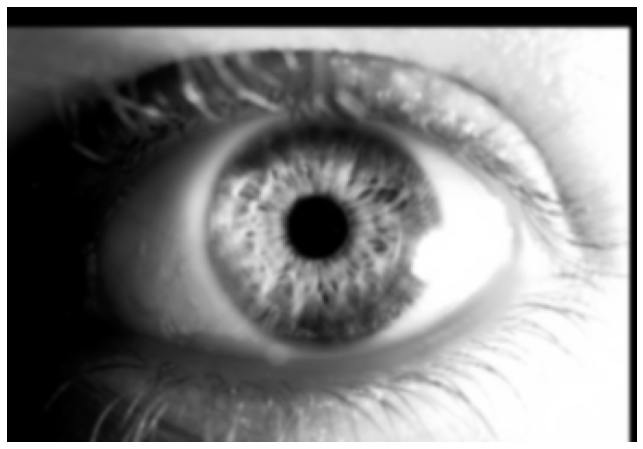

In [4]:

gauss_eye = gaussian_filter(eye, 1)

plt.figure(figsize=(15,8))
plt.imshow(gauss_eye, cmap='gray')
plt.axis('off')
plt.show()

Visually there doesn't appear to be a significant difference between the kernel sizes and the results. We will continue forward with the (5x5) kernel

### Laplacian filter on camera image (high pass filtering)

In [5]:
#scipy's implementation of gaussian filter
gauss_blur = gaussian_filter(cam, 1)

#subtract gaussian filter image from original image
lap_cam = cam - gauss_blur

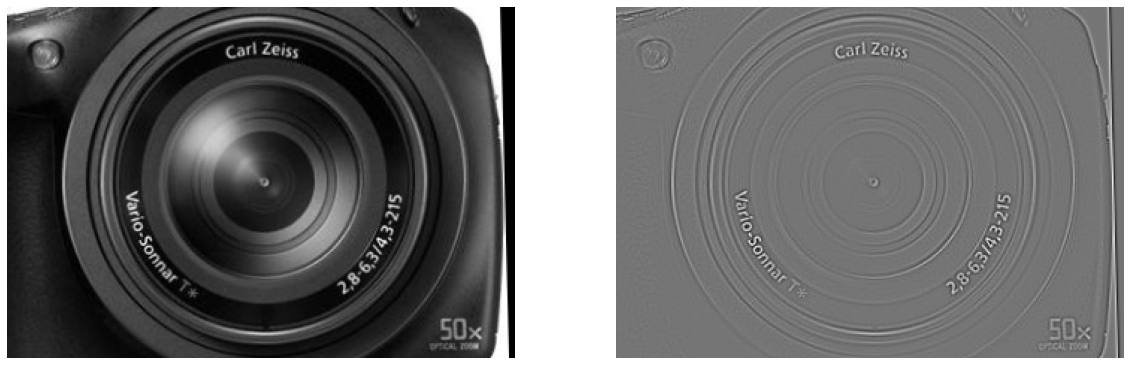

In [6]:
plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.subplot(121)
plt.imshow(cam, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(lap_cam, cmap='gray')
plt.axis('off')

plt.show()

### Hybrid Image

In [7]:
# empty array for the hybrid image
hybrid = np.zeros(cam.shape)

In [8]:
# iterate over each pixel value for the two filtered images and compute average
for row in range(hybrid.shape[0]):
    for col in range(hybrid.shape[1]):
        
            hybrid[row][col] = np.mean([gauss_eye[row][col],lap_cam[row][col]])

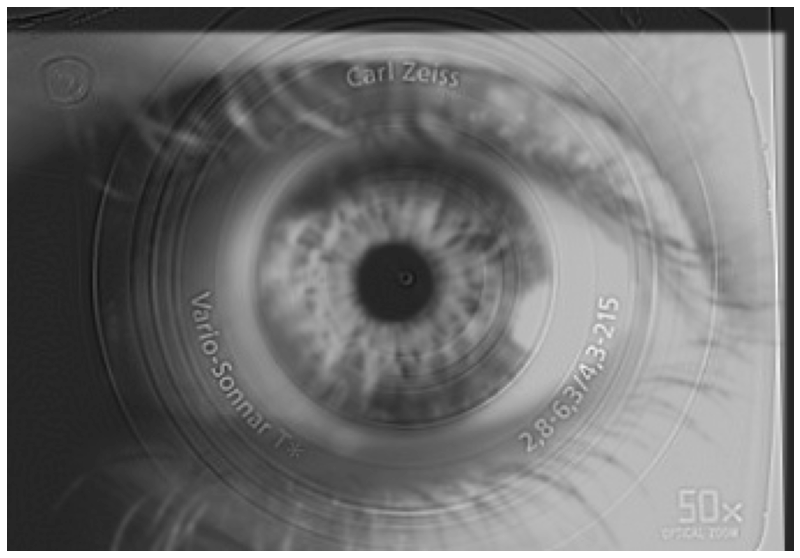

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(hybrid, cmap='gray')
plt.axis('off')
plt.show()

## Result

The resulting image is clearly a mashup between the two original images. When I stand back far from the screen, I do clearly see an eye. However when i'm up close, I can't help but to see both the eye and the camera together, not just the camera by itself. This probably has to do with the psychology of perception. I know what to look for and what the underlying image is. My perception of the image close up would be different if I didn't have prior knowledge. (in all honesty)